In [ ]:
%matplotlib inline


# Compare cross decomposition methods


Simple usage of various cross decomposition algorithms:
- PLSCanonical
- PLSRegression, with multivariate response, a.k.a. PLS2
- PLSRegression, with univariate response, a.k.a. PLS1
- CCA

Given 2 multivariate covarying two-dimensional datasets, X, and Y,
PLS extracts the 'directions of covariance', i.e. the components of each
datasets that explain the most shared variance between both datasets.
This is apparent on the **scatterplot matrix** display: components 1 in
dataset X and dataset Y are maximally correlated (points lie around the
first diagonal). This is also true for components 2 in both dataset,
however, the correlation across datasets for different components is
weak: the point cloud is very spherical.



Automatically created module for IPython interactive environment


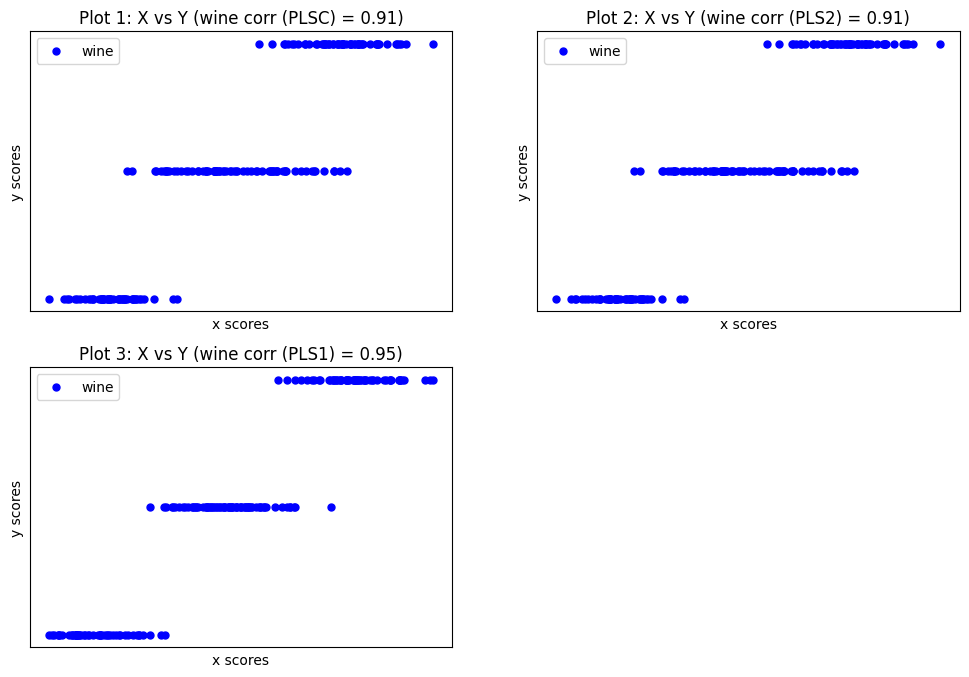

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.cross_decomposition import PLSCanonical, PLSRegression, CCA

# #############################################################################
# Load the Wine Quality Dataset
data = load_wine()
X = data.data  # Input variables
Y = data.target  # Target variable

# #############################################################################
# Canonical (symmetric) PLS

# Transform data
# ~~~~~~~~~~~~~~
plsca = PLSCanonical(n_components=1)
plsca.fit(X, Y)
X_plsc, Y_plsc = plsca.transform(X, Y)


# Scatter plot of scores
# ~~~~~~~~~~~~~~~~~~~~~~
# 1) On diagonal plot X vs Y scores on each components
plt.figure(figsize=(12, 8))
plt.subplot(221)
plt.scatter(X_plsc[:, 0], Y_plsc[:, 0], label="wine",
            marker="o", c="b", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Plot 1: X vs Y (wine corr (PLSC) = %.2f)' %
          np.corrcoef(X_plsc[:, 0], Y_plsc[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

pls2 = PLSRegression(n_components=1)  # Reduce to 1 component
pls2.fit(X, Y)
X_pls2, Y_pls2 = pls2.transform(X, Y)

plt.subplot(222)
plt.scatter(X_pls2[:, 0], Y_pls2[:, 0], label="wine",
            marker="o", c="b", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Plot 2: X vs Y (wine corr (PLS2) = %.2f)' %
          np.corrcoef(X_pls2[:, 0], Y_pls2[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

pls1 = CCA(n_components=1)  # Reduce to 1 component
pls1.fit(X, Y)
X_pls1, Y_pls1 = pls1.transform(X, Y)

plt.subplot(223)
plt.scatter(X_pls1[:, 0], Y_pls1[:, 0], label="wine",
            marker="o", c="b", s=25)
plt.xlabel("x scores")
plt.ylabel("y scores")
plt.title('Plot 3: X vs Y (wine corr (PLS1) = %.2f)' %
          np.corrcoef(X_pls1[:, 0], Y_pls1[:, 0])[0, 1])
plt.xticks(())
plt.yticks(())
plt.legend(loc="best")

plt.show()

